In [10]:
import pandas as pd

sales_with_rarity = pd.read_csv('sales_with_rarity.csv')

In [11]:
data = sales_with_rarity[sales_with_rarity.canisterId == 'pk6rk-6aaaa-aaaae-qaazq-cai']

In [14]:
data[['rank', 'price']]

,rank,price
47718,0,12000000000
47719,0,500000000
47720,0,12000000000
47721,0,500000000
47722,1,11500000000
...,...,...
57193,2007,500000000
57194,2008,1500000000
57195,2008,500000000
57196,2008,1500000000


In [16]:
!pip3.11 install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 3.0 MB/s eta 0:00:00a 0:00:01


In [29]:
data['rank'].replace(0, 1)

47718       1
47719       1
47720       1
47721       1
47722       1
         ... 
57193    2007
57194    2008
57195    2008
57196    2008
57197    2008
Name: rank, Length: 9480, dtype: int64

In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error
import numpy as np


# Split the data into features and target variable
training_data = data.copy()
# training_data['rank'] = training_data['rank'].replace(0, 1)
# training_data['rank'] = np.log(training_data['rank'])
X = training_data[['rank']]
y = training_data['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the models
models = {
    # 'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42),
    # 'XGBoost': XGBRegressor(random_state=42),
    # 'LightGBM': LGBMRegressor(random_state=42)
}

# Train and evaluate the models
rmse_scores = {}

for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate RMSE
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    
    # Store the RMSE
    rmse_scores[model_name] = rmse

# Print RMSE scores
for model_name, rmse in rmse_scores.items():
    print(f"{model_name}: RMSE = {rmse:.4f}")


Random Forest: RMSE = 11235549626.7898


In [105]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import onnx
import skl2onnx
from skl2onnx import convert_sklearn
from skl2onnx.common.data_types import FloatTensorType

# Step 1: Prepare the data
X = training_data[['rank']].values
y = training_data['price'].values

# Step 2: Create and train the model
model = LinearRegression()
model.fit(X, y)

# Step 3: Convert the model to ONNX format
initial_type = [('float_input', FloatTensorType([None, 1]))]
onnx_model = convert_sklearn(model, initial_types=initial_type)

# Save the ONNX model to a file
with open("linear_regression.onnx", "wb") as f:
    f.write(onnx_model.SerializeToString())
pd.DataFrame(columns=['rank'], data=[[500]])

In [139]:
X

array([[   0],
       [   0],
       [   0],
       ...,
       [2008],
       [2008],
       [2008]])

<Axes: >

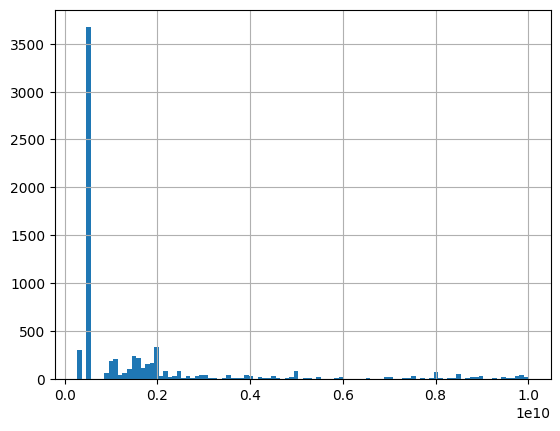

In [137]:
training_data[training_data['price']<10000000000].price.hist(bins=100)

In [140]:
training_data.price.sort_values()

53972       275000000
53976       275000000
56263       300000000
48136       300000000
49541       300000000
             ...     
49280     77700000000
49212    100000000000
49210    100000000000
56240    122200000000
56236    122200000000
Name: price, Length: 9480, dtype: int64

In [129]:
import tensorflow as tf
from tensorflow import keras
import tf2onnx  # For ONNX conversion
import pandas as pd
import numpy as np

# Assuming you already have your training data in a DataFrame called 'training_data'
X = training_data[['rank']].values
y = training_data['price'].values
print(X)
print(y)

# Build the TensorFlow Model
model = keras.Sequential([
    keras.layers.Dense(1, input_shape=[1])  # Simple linear regression with one feature
])
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the Model
model.fit(X, y, epochs=10, verbose=0)  # You can adjust epochs as needed

# Convert the Model to ONNX
# Define input and output names for ONNX
input_signature = [tf.TensorSpec((None, 1), tf.float32, name='input')]
output_signature = [tf.TensorSpec((None, 1), tf.float32, name='output')]
model.output_names=['output']

# Export to ONNX (Corrected line)
onnx_model, _ = tf2onnx.convert.from_keras(model, input_signature, opset=13) 
with open("linear_regression_model.onnx", "wb") as f:
    f.write(onnx_model.SerializeToString())


[[   0]
 [   0]
 [   0]
 ...
 [2008]
 [2008]
 [2008]]
[12000000000   500000000 12000000000 ...   500000000  1500000000
   500000000]


/opt/homebrew/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Type is unsupported, or the types of the items don't match field type in CollectionDef. Note this is a warning and probably safe to ignore.
'NoneType' object has no attribute 'name'


Type is unsupported, or the types of the items don't match field type in CollectionDef. Note this is a warning and probably safe to ignore.
'NoneType' object has no attribute 'name'


In [130]:
y

array([12000000000,   500000000, 12000000000, ...,   500000000,
        1500000000,   500000000])

In [143]:

model.predict(pd.DataFrame(columns=['rank'], data=[[5000]]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


array([[13113.578]], dtype=float32)

In [40]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error


training_data = data.copy()
X = training_data[['rank']]
y = training_data['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model_name = 'Random Forest' 

model = RandomForestRegressor(random_state=42)
# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"RMSE = {rmse:.4f}")

RMSE = 11235549626.7898


In [96]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Assuming `data` is already defined and contains the columns 'rank' and 'price'
training_data = data.copy()
X = training_data[['rank']]
y = training_data['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the data
mean = X_train.mean()
std = X_train.std()
X_train = (X_train - mean) / std
X_test = (X_test - mean) / std

# Define the model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(X_train, y_train, epochs=100, validation_split=0.2, verbose=0)

# Make predictions
y_pred = model.predict(X_test).flatten()

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"RMSE = {rmse:.4f}")


/opt/homebrew/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step
RMSE = 13335891725.0929


In [102]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tf2onnx
import onnx

# Assuming `data` is already defined and contains the columns 'rank' and 'price'
training_data = data.copy()
X = training_data[['rank']]
y = training_data['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the data
mean = X_train.mean()
std = X_train.std()
X_train = (X_train - mean) / std
X_test = (X_test - mean) / std

# Define the model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(X_train, y_train, epochs=100, validation_split=0.2, verbose=0)

# Make predictions
y_pred = model.predict(X_test).flatten()

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE = {rmse:.4f}")

# Convert the model to ONNX format
spec = (tf.TensorSpec(model.inputs[0].shape, model.inputs[0].dtype),)
output_path = 'model.onnx'
model_proto, _ = tf2onnx.convert.from_keras(model, input_signature=spec, output_path=output_path)

# Load and check the ONNX model
onnx_model = onnx.load(output_path)
onnx.checker.check_model(onnx_model)
print("The model is checked and is valid.")


/opt/homebrew/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 359us/step
RMSE = 13336257719.3829


AttributeError: 'Sequential' object has no attribute 'output_names'

In [83]:
import pandas as pd
import numpy as np
import tensorflow_decision_forests as tfdf
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load your data
# data = pd.read_csv('your_data.csv')

# Assuming `data` is already loaded and is a DataFrame
training_data = data.copy()
X = training_data[['rank']]
y = training_data['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Combine X and y back for TensorFlow Decision Forests
train_df = pd.concat([X_train, y_train], axis=1)
test_df = pd.concat([X_test, y_test], axis=1)

# Convert the training DataFrame to a TensorFlow dataset
train_dataset = tfdf.keras.pd_dataframe_to_tf_dataset(train_df, label='price', task=tfdf.keras.Task.REGRESSION)

# Define the model
model = tfdf.keras.RandomForestModel(task=tfdf.keras.Task.REGRESSION)

# Train the model
model.fit(train_dataset)

# Convert the testing DataFrame to a TensorFlow dataset
test_dataset = tfdf.keras.pd_dataframe_to_tf_dataset(test_df.drop(columns=['price']), task=tfdf.keras.Task.REGRESSION)

# Make predictions
y_pred = model.predict(test_dataset)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE = {rmse:.4f}")
test = tfdf.keras.pd_dataframe_to_tf_dataset(pd.DataFrame(columns=['price', 'rank'], data=[[10, 500]]).drop(columns=['price']), task=tfdf.keras.Task.REGRESSION)
x = model.predict(test)
print(X)
# Convert the model to ONNX format
import onnx
import tf2onnx

# Define the path to save the ONNX model
onnx_model_path = "model.onnx"

# Convert the Keras model to ONNX
spec = (tf.TensorSpec((None, X_train.shape[1]), tf.float32, name="input"),)
output_path = tf2onnx.convert.from_keras(model, input_signature=spec, opset=13, output_path=onnx_model_path)

print(f"Model saved to {onnx_model_path}")


Use /var/folders/vs/v2spybcx4wz_xfk2dbj37g0c0000gn/T/tmp59gmcg84 as temporary training directory
Reading training dataset...
Training dataset read in 0:00:00.073016. Found 7584 examples.
Training model...
Model trained in 0:00:00.427315
Compiling model...


[INFO 24-06-13 08:05:35.0453 CEST kernel.cc:1233] Loading model from path /var/folders/vs/v2spybcx4wz_xfk2dbj37g0c0000gn/T/tmp59gmcg84/model/ with prefix 67c00ae28d3d437f
[INFO 24-06-13 08:05:35.1929 CEST decision_forest.cc:734] Model loaded with 300 root(s), 146364 node(s), and 1 input feature(s).
[INFO 24-06-13 08:05:35.1929 CEST abstract_model.cc:1344] Engine "RandomForestOptPred" built
[INFO 24-06-13 08:05:35.1930 CEST kernel.cc:1061] Use fast generic engine


Model compiled.
2/2 [==============================] - 0s 13ms/step
RMSE = 13120764450.5249
1/1 [==============================] - 0s 18ms/step
       rank
47718     0
47719     0
47720     0
47721     0
47722     1
...     ...
57193  2007
57194  2008
57195  2008
57196  2008
57197  2008

[9480 rows x 1 columns]
Type is unsupported, or the types of the items don't match field type in CollectionDef. Note this is a warning and probably safe to ignore.
'NoneType' object has no attribute 'name'


Type is unsupported, or the types of the items don't match field type in CollectionDef. Note this is a warning and probably safe to ignore.
'NoneType' object has no attribute 'name'
ERROR:tf2onnx.tf_loader:Could not find table resource to replace placeholder random_forest_model_4/89599
ERROR:tf2onnx.tfonnx:Tensorflow op [random_forest_model_4/StatefulPartitionedCall/inference_op: SimpleMLInferenceOpWithHandle] is not supported
ERROR:tf2onnx.tfonnx:Unsupported ops: Counter({'SimpleMLInferenceOpWithHandle': 1})


Model saved to model.onnx


In [95]:
y_pred
# ).isna().sum()

array([[nan],
       [nan],
       [nan],
       ...,
       [nan],
       [nan],
       [nan]], dtype=float32)

In [82]:
test = tfdf.keras.pd_dataframe_to_tf_dataset(pd.DataFrame(columns=['price', 'rank'], data=[[10, 500]]).drop(columns=['price']), task=tfdf.keras.Task.REGRESSION)
x = model.predict(test)
x

1/1 [==============================] - 0s 27ms/step


array([[5.6107725e+08]], dtype=float32)

In [66]:
(tf.TensorSpec((None, X_train.shape[1]), tf.float32, name="input"),)

(TensorSpec(shape=(None, 1), dtype=tf.float32, name='input'),)

In [61]:
# Convert the model to ONNX format
import onnx
import tf2onnx

# Define the path to save the ONNX model
onnx_model_path = "model.onnx"

# Convert the Keras model to ONNX
spec = (tf.TensorSpec((None, X_train.shape[1]), tf.float32, name="input"),)
output_path = tf2onnx.convert.from_keras(model, input_signature=spec, opset=13, output_path=onnx_model_path)

print(f"Model saved to {onnx_model_path}")


Type is unsupported, or the types of the items don't match field type in CollectionDef. Note this is a warning and probably safe to ignore.
'NoneType' object has no attribute 'name'


Type is unsupported, or the types of the items don't match field type in CollectionDef. Note this is a warning and probably safe to ignore.
'NoneType' object has no attribute 'name'
ERROR:tf2onnx.tf_loader:Could not find table resource to replace placeholder random_forest_model_3/88925
ERROR:tf2onnx.tfonnx:Tensorflow op [random_forest_model_3/StatefulPartitionedCall/inference_op: SimpleMLInferenceOpWithHandle] is not supported
ERROR:tf2onnx.tfonnx:Unsupported ops: Counter({'SimpleMLInferenceOpWithHandle': 1})


Model saved to model.onnx


In [62]:
X_test['y_pred'] = y_pred
X_test['y_test'] = y_test


In [63]:
y_test.min()

300000000

<Axes: xlabel='y_test', ylabel='y_pred'>

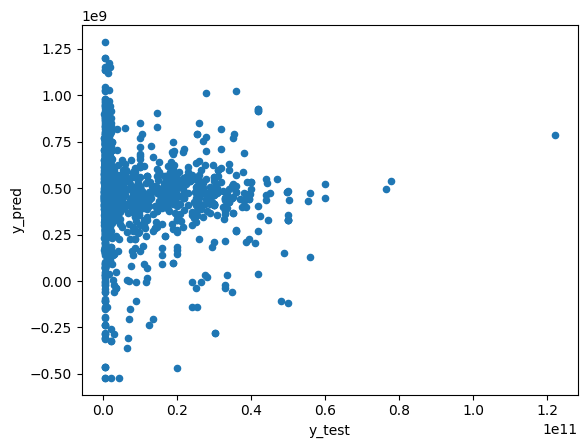

In [64]:
X_test[['y_pred', 'y_test']].plot(kind='scatter', x= 'y_test', y = 'y_pred')

<Axes: >

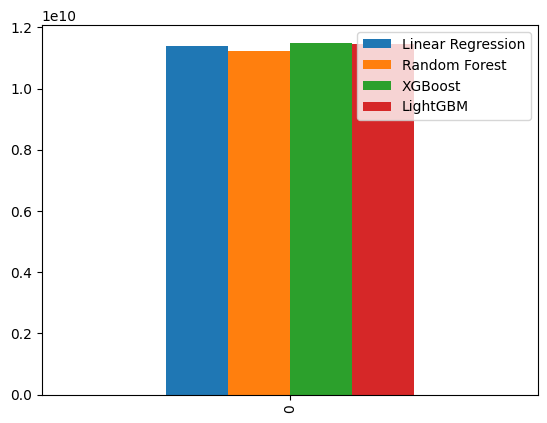

In [32]:
pd.DataFrame([rmse_scores]).plot(kind='bar')

In [ ]:
Linear Regression: RMSE = 11395097181.3316
Random Forest: RMSE = 11235549626.7898
XGBoost: RMSE = 11502246752.4344
LightGBM: RMSE = 11450931230.9253

<Axes: >

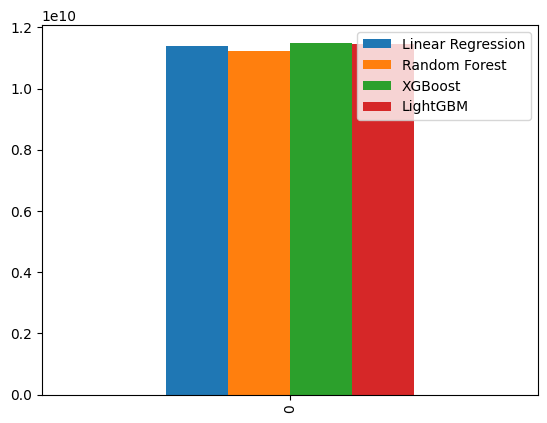

In [22]:
pd.DataFrame([rmse_scores]).plot(kind='bar')